In [1]:
import pandas as pd #for handling raw data
import numpy as np
import codecs
import matplotlib.pyplot as plt
#opens the data set, in comment you cant paste the file directory to r'___' C:\...\...\filename.csv
df=pd.read_csv(codecs.open(r'1907672.csv','rU', 'utf-8'),
               delimiter=',',decimal='.',header=0)

In [2]:
#df=df[['DATE', 'TAVG', 'TMAX', 'TMIN']]
df_bp, df_lorinc = [x for _, x in df.groupby(df['STATION'])]

[Text(0, 0.5, 'T[°C]'), Text(0.5, 0, 'DATE')]

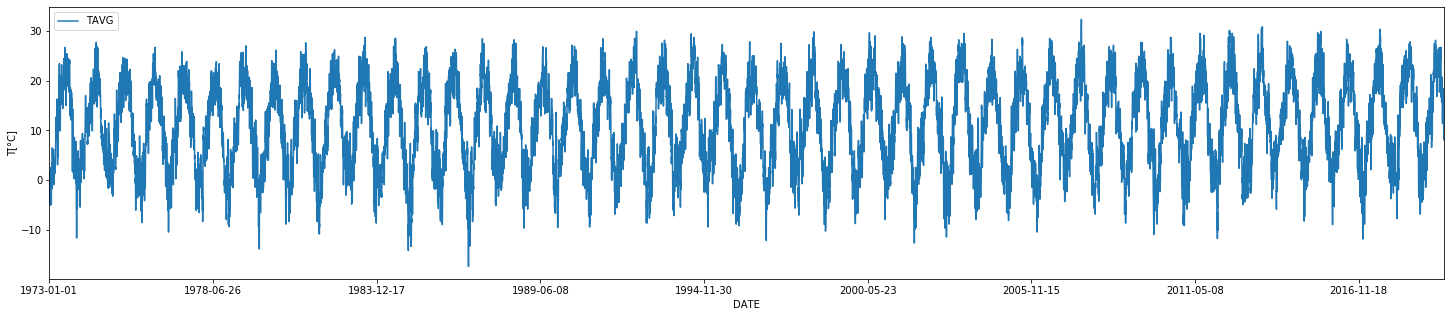

In [3]:
ax=df_lorinc.plot(figsize = (25,5),kind='line', x='DATE', y='TAVG')

ax.set(xlabel="DATE", ylabel="T[°C]")

In [4]:
date = df_lorinc["DATE"].str.split("-", n = 2, expand = True)

df_lorinc["year"]=date[0]
df_lorinc["month"]=date[1]
df_lorinc["day"]=date[2]
df_lorinc.drop(['NAME','STATION', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE','TAVG_ATTRIBUTES',
                'TMAX','TMAX_ATTRIBUTES','TMIN','TMIN_ATTRIBUTES'], axis=1, inplace=True)

#df_lorinc['DATE'] = pd.to_datetime(df['DATE'])
df_lorinc.head()

TAVG  year month day
0  -1.2  1973    01  01
1   0.5  1973    01  02
2   1.8  1973    01  03
3   1.2  1973    01  04
4  -0.5  1973    01  05

In [5]:
df_lorinc[['year','month','day']]=df_lorinc[['year','month','day']].astype(float)
df_lorinc.dtypes

TAVG     float64
year     float64
month    float64
day      float64
dtype: object

In [6]:
from sklearn.preprocessing import StandardScaler

msk = np.random.rand(len(df_lorinc)) < 0.9
train = df_lorinc[msk]
test = df_lorinc[~msk]
test['TAVG'] = (test['TAVG'] - test['TAVG'].min()) / (test['TAVG'].max() - test['TAVG'].min())
test
#scaler = StandardScaler()
#test['TAVG']=scaler.fit_transform(test['TAVG'])

/home/e/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


TAVG    year  month   day
14     0.196121  1973.0    1.0  15.0
15     0.232759  1973.0    1.0  16.0
25     0.262931  1973.0    1.0  26.0
72     0.368534  1973.0    3.0  15.0
75     0.390086  1973.0    3.0  18.0
80     0.478448  1973.0    3.0  23.0
90     0.558190  1973.0    4.0   2.0
94     0.560345  1973.0    4.0   6.0
106    0.461207  1973.0    4.0  18.0
126    0.646552  1973.0    5.0   8.0
151    0.803879  1973.0    6.0   2.0
157    0.696121  1973.0    6.0   8.0
171    0.661638  1973.0    6.0  22.0
175    0.765086  1973.0    6.0  26.0
185    0.769397  1973.0    7.0   6.0
194    0.799569  1973.0    7.0  15.0
195    0.821121  1973.0    7.0  16.0
197    0.803879  1973.0    7.0  18.0
200    0.806034  1973.0    7.0  21.0
207    0.627155  1973.0    7.0  28.0
210    0.734914  1973.0    7.0  31.0
215    0.788793  1973.0    8.0   5.0
246    0.801724  1973.0    9.0   5.0
255    0.581897  1973.0    9.0  14.0
257    0.657328  1973.0    9.0  16.0
262    0.663793  1973.0    9.0  21.0
265    0.693966  1973.0    9.0  24.0
279    0.657328  1973.0   10.0   8.0
287    0.605603  1973.0   10.0  16.0
291    0.446121  1973.0   10.0  20.0
...         ...     ...    ...   ...
16863  0.635776  2019.0    4.0   8.0
16875  0.631466  2019.0    4.0  20.0
16882  0.599138  2019.0    4.0  27.0
16907  0.730603  2019.0    5.0  26.0
16908  0.681034  2019.0    5.0  27.0
16915  0.760776  2019.0    6.0   3.0
16925  0.894397  2019.0    6.0  13.0
16931  0.801724  2019.0    6.0  19.0
16934  0.806034  2019.0    6.0  22.0
16937  0.866379  2019.0    6.0  25.0
16939  0.909483  2019.0    6.0  27.0
16944  0.885776  2019.0    7.0   2.0
16952  0.726293  2019.0    7.0  10.0
16956  0.704741  2019.0    7.0  14.0
16962  0.831897  2019.0    7.0  20.0
16966  0.808190  2019.0    7.0  24.0
16971  0.778017  2019.0    7.0  29.0
16982  0.829741  2019.0    8.0   9.0
16986  0.808190  2019.0    8.0  13.0
16994  0.808190  2019.0    8.0  21.0
16995  0.803879  2019.0    8.0  22.0
17006  0.816810  2019.0    9.0   2.0
17012  0.698276  2019.0    9.0   8.0
17019  0.657328  2019.0    9.0  15.0
17020  0.737069  2019.0    9.0  16.0
17030  0.672414  2019.0    9.0  26.0
17033  0.668103  2019.0    9.0  29.0
17034  0.700431  2019.0    9.0  30.0
17036  0.655172  2019.0   10.0   2.0
17038  0.528017  2019.0   10.0   4.0

[1733 rows x 4 columns]

In [7]:
train['TAVG'] = (train['TAVG'] - train['TAVG'].min()) / (train['TAVG'].max() - train['TAVG'].min())
train

/home/e/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


TAVG    year  month   day
0      0.334719  1973.0    1.0   1.0
1      0.370062  1973.0    1.0   2.0
2      0.397089  1973.0    1.0   3.0
3      0.384615  1973.0    1.0   4.0
4      0.349272  1973.0    1.0   5.0
5      0.326403  1973.0    1.0   6.0
6      0.282744  1973.0    1.0   7.0
7      0.322245  1973.0    1.0   8.0
8      0.332640  1973.0    1.0   9.0
9      0.326403  1973.0    1.0  10.0
10     0.380457  1973.0    1.0  11.0
11     0.324324  1973.0    1.0  12.0
12     0.353430  1973.0    1.0  13.0
13     0.272349  1973.0    1.0  14.0
16     0.297297  1973.0    1.0  17.0
17     0.353430  1973.0    1.0  18.0
18     0.405405  1973.0    1.0  19.0
19     0.390852  1973.0    1.0  20.0
20     0.397089  1973.0    1.0  21.0
21     0.380457  1973.0    1.0  22.0
22     0.413721  1973.0    1.0  23.0
23     0.380457  1973.0    1.0  24.0
24     0.376299  1973.0    1.0  25.0
26     0.259875  1973.0    1.0  27.0
27     0.295218  1973.0    1.0  28.0
28     0.359667  1973.0    1.0  29.0
29     0.409563  1973.0    1.0  30.0
30     0.390852  1973.0    1.0  31.0
31     0.343035  1973.0    2.0   1.0
32     0.405405  1973.0    2.0   2.0
...         ...     ...    ...   ...
17008  0.731809  2019.0    9.0   4.0
17009  0.762994  2019.0    9.0   5.0
17010  0.790021  2019.0    9.0   6.0
17011  0.719335  2019.0    9.0   7.0
17013  0.704782  2019.0    9.0   9.0
17014  0.686071  2019.0    9.0  10.0
17015  0.750520  2019.0    9.0  11.0
17016  0.790021  2019.0    9.0  12.0
17017  0.783784  2019.0    9.0  13.0
17018  0.773389  2019.0    9.0  14.0
17021  0.769231  2019.0    9.0  17.0
17022  0.654886  2019.0    9.0  18.0
17023  0.613306  2019.0    9.0  19.0
17024  0.604990  2019.0    9.0  20.0
17025  0.596674  2019.0    9.0  21.0
17026  0.654886  2019.0    9.0  22.0
17027  0.667360  2019.0    9.0  23.0
17028  0.715177  2019.0    9.0  24.0
17029  0.708940  2019.0    9.0  25.0
17031  0.704782  2019.0    9.0  27.0
17032  0.700624  2019.0    9.0  28.0
17035  0.700624  2019.0   10.0   1.0
17037  0.607069  2019.0   10.0   3.0
17039  0.571726  2019.0   10.0   5.0
17040  0.571726  2019.0   10.0   6.0
17041  0.528067  2019.0   10.0   7.0
17042  0.534304  2019.0   10.0   8.0
17043  0.663202  2019.0   10.0   9.0
17044  0.642412  2019.0   10.0  10.0
17045  0.621622  2019.0   10.0  11.0

[15313 rows x 4 columns]

In [8]:
train_out = pd.DataFrame(index=train.index)
train_out=train['TAVG']
train.drop(['TAVG'], axis=1, inplace=True)

/home/e/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [9]:
test_out = pd.DataFrame(index=test.index)
test_out=test['TAVG']
test.drop(['TAVG'], axis=1, inplace=True)

In [10]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model

def create_mlp(dim, regress=False):
    # define our MLP network
    model = Sequential()
    model.add(Dense(8, input_dim=dim, activation="relu"))
    model.add(Dense(4, activation="relu"))

    # check to see if the regression node should be added
    if regress:
        model.add(Dense(1, activation="linear"))

    # return our model
    return model

Using TensorFlow backend.


In [15]:
# import the necessary packages
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import argparse
import locale
import os 
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

# create our MLP and then compile the model using mean absolute
# percentage error as our loss, implying that we seek to minimize
# the absolute percentage difference between our price *predictions*
# and the *actual prices*
model = create_mlp(train.shape[1], regress=True)
opt = Adam(lr=1e-3, decay=1e-3 / 200)
checkpointer = ModelCheckpoint(filepath="modified.hdf5", save_best_only=True, verbose=1)
es = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)
model.compile(loss="mean_absolute_percentage_error", optimizer=opt)

# train the model
print("[INFO] training model...")
model.fit(train, train_out, validation_data=(test, test_out),
          epochs=20, batch_size=8,callbacks=[checkpointer,es])

[INFO] training model...
Train on 15313 samples, validate on 1733 samples
Epoch 1/20
15313/15313 [==============================] - 2s 148us/step - loss: 57119.8159 - val_loss: 30565759.8042

Epoch 00001: val_loss improved from inf to 30565759.80422, saving model to modified.hdf5
Epoch 2/20
15313/15313 [==============================] - 2s 135us/step - loss: 3449912.0001 - val_loss: 15596822.0049

Epoch 00002: val_loss improved from 30565759.80422 to 15596822.00489, saving model to modified.hdf5
Epoch 3/20
15313/15313 [==============================] - 2s 145us/step - loss: 1764508.3838 - val_loss: 5193839.0926

Epoch 00003: val_loss improved from 15596822.00489 to 5193839.09260, saving model to modified.hdf5
Epoch 4/20
15313/15313 [==============================] - 2s 140us/step - loss: 585695.4171 - val_loss: 3262846.0361

Epoch 00004: val_loss improved from 5193839.09260 to 3262846.03606, saving model to modified.hdf5
Epoch 5/20
15313/15313 [==============================] - 2s 137u

In [16]:
x=model.predict([[[2019,10,26]]])
mint=df_lorinc[msk]['TAVG'].min()
maxt=df_lorinc[msk]['TAVG'].max()
print(x*maxt)

[[-12.32689]]


In [17]:
x=model.predict([[[2019,11,5]]])
mint=df_lorinc[msk]['TAVG'].min()
maxt=df_lorinc[msk]['TAVG'].max()
print(x*maxt)

[[3.7068207]]


In [18]:
x=model.predict([[[2019,11,26]]])
mint=df_lorinc[msk]['TAVG'].min()
maxt=df_lorinc[msk]['TAVG'].max()
print(x*maxt)

[[-15.478261]]


In [ ]:
#Managed my time badly, did not have time to optimize hyperparameters unfortunately